In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload
import matplotlib
import scipy
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import numpy as np
import pandas as pd
import xarray as xr
import xesmf as xe
import os
import glob
import seaborn as sns
import warnings
import datetime
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
moddir='/glade/scratch/bitz/cesm23iw_fixdt/run'
filename='cesm23iw_fixdt.ww3.hi.2012-01-15-00000.nc'

file=moddir+'/control/'+filename
long=xr.open_mfdataset(file)
file=moddir+'/ts1800-100/'+filename
med=xr.open_mfdataset(file)
file=moddir+'/ts900-300/'+filename
dyn=xr.open_mfdataset(file)
file=moddir+'/ts100/'+filename
short=xr.open_mfdataset(file)

In [3]:
## add VTC subcycle run
vtcdir='/glade/scratch/vcooper/cesm23iws1tsks_subcycle2/run'
filename='cesm23iws1tsks_subcycle2.ww3.hi.2012-01-15-00000.nc'

file=vtcdir+'/'+filename
sub=xr.open_mfdataset(file)

vtcdir='/glade/scratch/vcooper/cesm23iws1tsks_subc2dtmin100/run'
filename='cesm23iws1tsks_subc2dtmin100.ww3.hi.2012-01-15-00000.nc'
file=vtcdir+'/'+filename
dtmin100=xr.open_mfdataset(file)

vtcdir='/glade/scratch/vcooper/cesm23iws1tsks_subc2dtice100/run'
filename='cesm23iws1tsks_subc2dtice100.ww3.hi.2012-01-15-00000.nc'
file=vtcdir+'/'+filename
dtice100=xr.open_mfdataset(file)

vtcdir='/glade/scratch/vcooper/cesm23iws1tsks_subc2dtmin30/run'
filename='cesm23iws1tsks_subc2dtmin30.ww3.hi.2012-01-15-00000.nc'
file=vtcdir+'/'+filename
dtmin30=xr.open_mfdataset(file)

In [4]:
## add FREQ coordinates
temp_f = xr.open_dataset('/glade/u/home/vcooper/analysis/waveice/ww1719ef_beau_cat.nc')
print(temp_f.f.values)

long['FREQ'] = temp_f.f.values
med['FREQ'] = temp_f.f.values
short['FREQ'] = temp_f.f.values
dyn['FREQ'] = temp_f.f.values
sub['FREQ'] = temp_f.f.values

dtmin100['FREQ'] = temp_f.f.values
dtice100['FREQ'] = temp_f.f.values
dtmin30['FREQ'] = temp_f.f.values

[0.04118    0.045298   0.0498278  0.05481058 0.06029164 0.06632081
 0.07295289 0.08024818 0.08827299 0.09710029 0.10681032 0.11749136
 0.1292405  0.14216454 0.15638101 0.17201911 0.18922101 0.20814312
 0.22895744 0.25185317 0.27703848 0.30474234 0.3352166  0.36873826
 0.40561208]


In [8]:
temp_f.f.values

array([0.04118   , 0.045298  , 0.0498278 , 0.05481058, 0.06029164,
       0.06632081, 0.07295289, 0.08024818, 0.08827299, 0.09710029,
       0.10681032, 0.11749136, 0.1292405 , 0.14216454, 0.15638101,
       0.17201911, 0.18922101, 0.20814312, 0.22895744, 0.25185317,
       0.27703848, 0.30474234, 0.3352166 , 0.36873826, 0.40561208],
      dtype=float32)

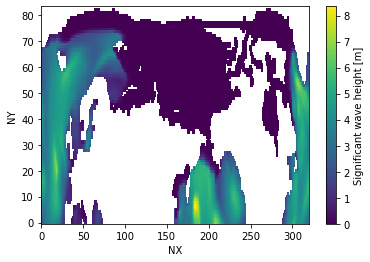

In [4]:
long.HS.sel(NY=range(300,384)).plot()

Text(0.5, 1.0, 'Significant Wave Height and Ice Fraction, Greenland Sea')

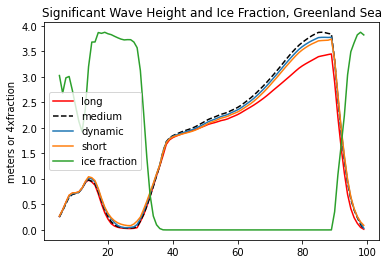

In [5]:
# alongside of Greenland, in/out of ice 
fig=plt.figure()
plt.plot(long.HS.sel(NY=372).sel(NX=range(5,105)),label='long',color='r')
plt.plot(med.HS.sel(NY=372).sel(NX=range(5,105)),label='medium',linestyle='--',color='k')
plt.plot(dyn.HS.sel(NY=372).sel(NX=range(5,105)),label='dynamic')
plt.plot(short.HS.sel(NY=372).sel(NX=range(5,105)),label='short')
plt.plot(4*long.ICE.sel(NY=372).sel(NX=range(5,105)),label='ice fraction')
plt.legend()
plt.ylabel('meters or 4xfraction')
plt.title('Significant Wave Height and Ice Fraction, Greenland Sea')

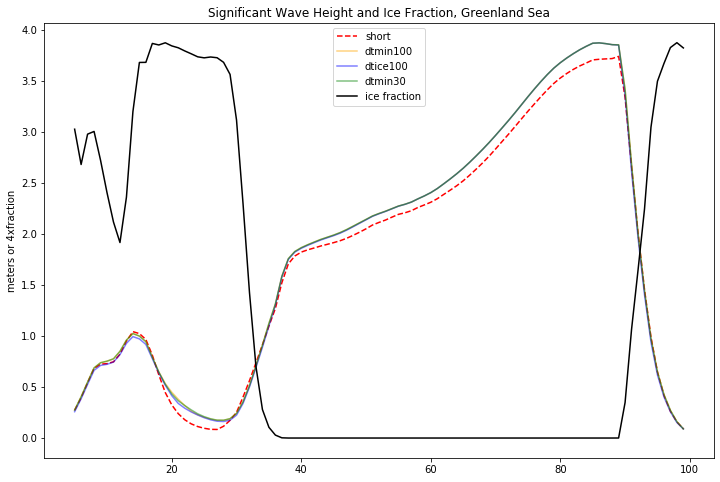

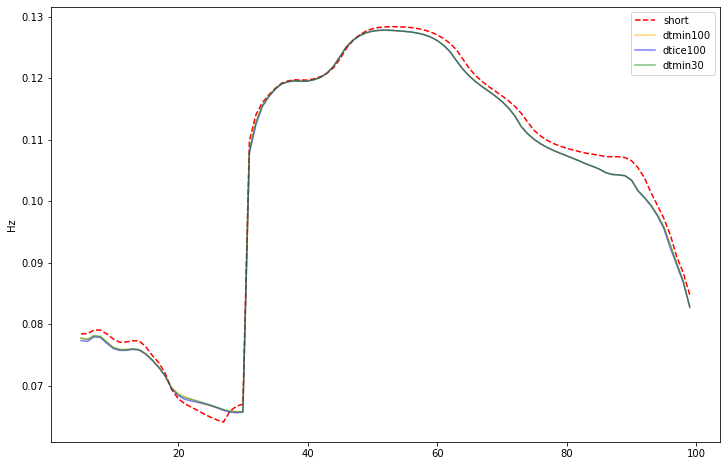

In [121]:
# alongside of Greenland, in/out of ice 
fig=plt.figure(figsize=(12,8))
plt.plot(short.HS.sel(NY=372).sel(NX=range(5,105)),label='short',color='r',ls='--')
plt.plot(dtmin100.HS.sel(NY=372).sel(NX=range(5,105)),label='dtmin100',alpha=0.5,c='orange')
plt.plot(dtice100.HS.sel(NY=372).sel(NX=range(5,105)),label='dtice100',alpha=0.5,c='b')
plt.plot(dtmin30.HS.sel(NY=372).sel(NX=range(5,105)),label='dtmin30',alpha=0.5,c='g')
plt.plot(4*short.ICE.sel(NY=372).sel(NX=range(5,105)),label='ice fraction',c='k')
plt.legend()
plt.ylabel('meters or 4xfraction')
plt.title('Significant Wave Height and Ice Fraction, Greenland Sea')
plt.show()

fig=plt.figure(figsize=(12,8))
plt.plot(short.FP0.sel(NY=372).sel(NX=range(5,105)),label='short',color='r',ls='--')
plt.plot(dtmin100.FP0.sel(NY=372).sel(NX=range(5,105)),label='dtmin100',alpha=0.5,c='orange')
plt.plot(dtice100.FP0.sel(NY=372).sel(NX=range(5,105)),label='dtice100',alpha=0.5,c='b')
plt.plot(dtmin30.FP0.sel(NY=372).sel(NX=range(5,105)),label='dtmin30',alpha=0.5,c='g')
plt.legend()
plt.ylabel('Hz')
plt.show()

Text(0.5, 1.0, 'Significant Wave Height and Ice Fraction, Greenland Sea')

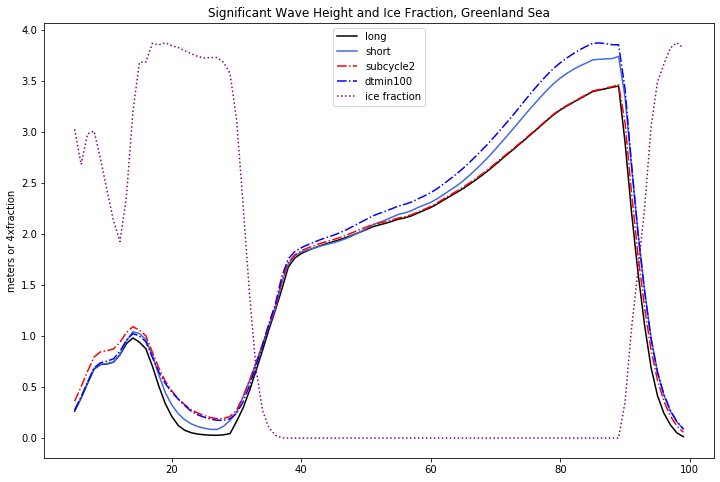

In [86]:
# alongside of Greenland, in/out of ice 
fig=plt.figure(figsize=(12,8))
plt.plot(long.HS.sel(NY=372).sel(NX=range(5,105)),label='long',color='k')
# # plt.plot(med.HS.sel(NY=372).sel(NX=range(5,105)),label='medium',linestyle='--',color='k')
# # plt.plot(dyn.HS.sel(NY=372).sel(NX=range(5,105)),label='dynamic')
plt.plot(short.HS.sel(NY=372).sel(NX=range(5,105)),label='short',c='royalblue')

plt.plot(sub.HS.sel(NY=372).sel(NX=range(5,105)),label='subcycle2',linestyle='-.',c='r')
plt.plot(dtmin100.HS.sel(NY=372).sel(NX=range(5,105)),label='dtmin100',linestyle='-.',c='b')

plt.plot(4*long.ICE.sel(NY=372).sel(NX=range(5,105)),label='ice fraction',ls='dotted',c='purple')
plt.legend()
plt.ylabel('meters or 4xfraction')
plt.title('Significant Wave Height and Ice Fraction, Greenland Sea')

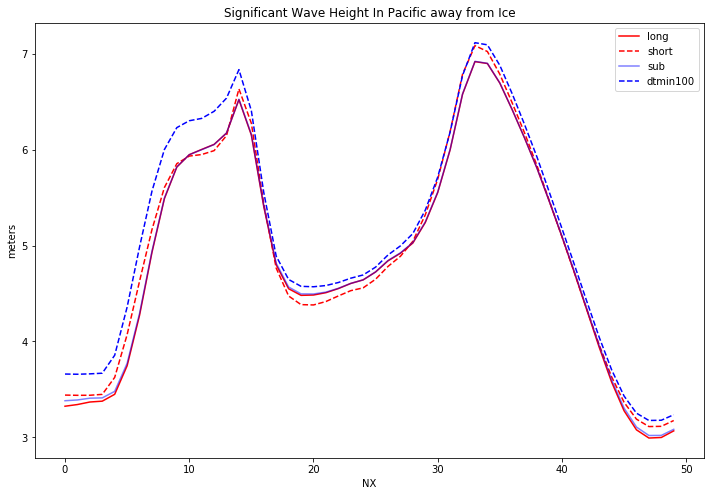

Text(0.5, 1.0, 'Significant Wave Height In Pacific away from Ice')

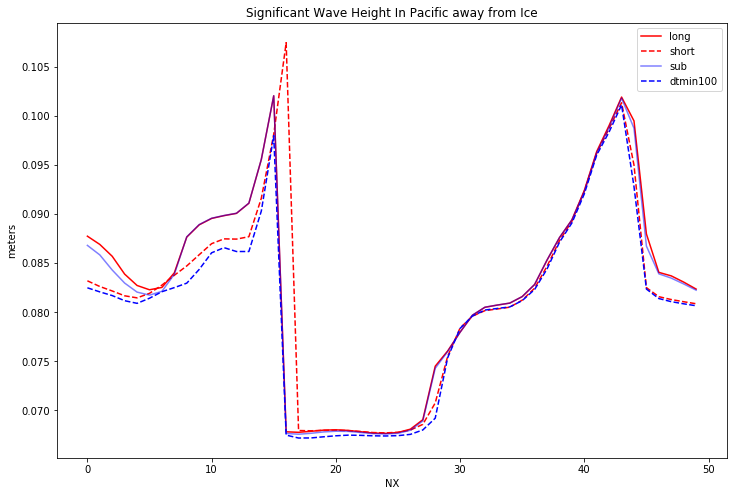

In [91]:
# midlatitudes of Pacific where no ice
fig=plt.figure(figsize=(12,8))
long.HS.sel(NY=300).sel(NX=range(175,225)).plot(color='r',label='long')
# med.HS.sel(NY=300).sel(NX=range(175,225)).plot(linestyle='--',color='k',label='medium')
# dyn.HS.sel(NY=300).sel(NX=range(175,225)).plot(linestyle='-',label='dynamic')
short.HS.sel(NY=300).sel(NX=range(175,225)).plot(linestyle='--',label='short',c='r')

plt.plot(sub.HS.sel(NY=300).sel(NX=range(175,225)),label='sub',linestyle='-',c='b',alpha=0.5)
plt.plot(dtmin100.HS.sel(NY=300).sel(NX=range(175,225)),label='dtmin100',linestyle='--',c='b')

plt.legend()
plt.ylabel('meters')
plt.title('Significant Wave Height In Pacific away from Ice')
plt.show()

# midlatitudes of Pacific where no ice
fig=plt.figure(figsize=(12,8))
long.FP0.sel(NY=300).sel(NX=range(175,225)).plot(color='r',label='long')
# med.HS.sel(NY=300).sel(NX=range(175,225)).plot(linestyle='--',color='k',label='medium')
# dyn.HS.sel(NY=300).sel(NX=range(175,225)).plot(linestyle='-',label='dynamic')
short.FP0.sel(NY=300).sel(NX=range(175,225)).plot(linestyle='--',label='short',c='r')

plt.plot(sub.FP0.sel(NY=300).sel(NX=range(175,225)),label='sub',linestyle='-',c='b',alpha=0.5)
plt.plot(dtmin100.FP0.sel(NY=300).sel(NX=range(175,225)),label='dtmin100',linestyle='--',c='b')

plt.legend()
plt.ylabel('meters')
plt.title('Significant Wave Height In Pacific away from Ice')

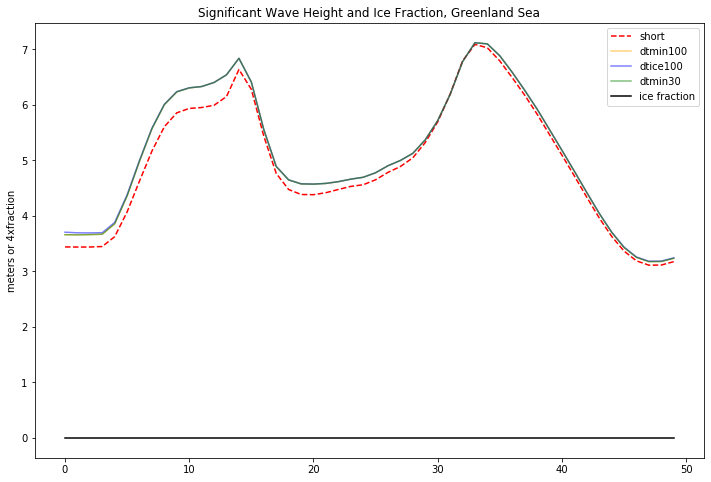

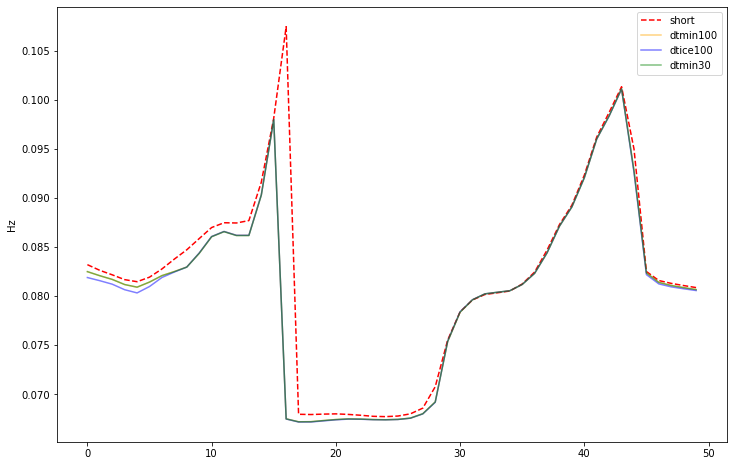

In [122]:
nysel = 300
nxrange = range(175,225)

fig=plt.figure(figsize=(12,8))
plt.plot(short.HS.sel(NY=nysel).sel(NX=nxrange),label='short',color='r',ls='--')
plt.plot(dtmin100.HS.sel(NY=nysel).sel(NX=nxrange),label='dtmin100',alpha=0.5,c='orange')
plt.plot(dtice100.HS.sel(NY=nysel).sel(NX=nxrange),label='dtice100',alpha=0.5,c='b')
plt.plot(dtmin30.HS.sel(NY=nysel).sel(NX=nxrange),label='dtmin30',alpha=0.5,c='g')
plt.plot(4*short.ICE.sel(NY=nysel).sel(NX=nxrange),label='ice fraction',c='k')
plt.legend()
plt.ylabel('meters or 4xfraction')
plt.title('Significant Wave Height and Ice Fraction, Greenland Sea')
plt.show()

fig=plt.figure(figsize=(12,8))
plt.plot(short.FP0.sel(NY=nysel).sel(NX=nxrange),label='short',color='r',ls='--')
plt.plot(dtmin100.FP0.sel(NY=nysel).sel(NX=nxrange),label='dtmin100',alpha=0.5,c='orange')
plt.plot(dtice100.FP0.sel(NY=nysel).sel(NX=nxrange),label='dtice100',alpha=0.5,c='b')
plt.plot(dtmin30.FP0.sel(NY=nysel).sel(NX=nxrange),label='dtmin30',alpha=0.5,c='g')
plt.legend()
plt.ylabel('Hz')
plt.show()

Text(0, 0.5, 'Spectral Density')

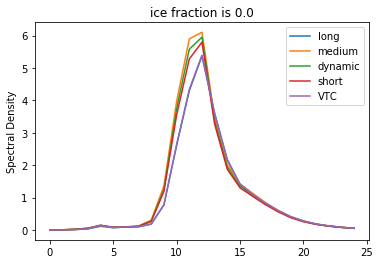

In [24]:
# sample gridpoint alongside of Greenland, outside of ice 
nx=67
fig=plt.figure()
plt.plot(long.EF.sel(NY=372).sel(NX=nx),label='long')
plt.plot(med.EF.sel(NY=372).sel(NX=nx),label='medium')
plt.plot(dyn.EF.sel(NY=372).sel(NX=nx),label='dynamic')
plt.plot(short.EF.sel(NY=372).sel(NX=nx),label='short')

plt.plot(sub.EF.sel(NY=372).sel(NX=nx),label='VTC')

plt.title('ice fraction is '+str(long.ICE.sel(NY=372).sel(NX=nx).values))
plt.legend()
plt.ylabel('Spectral Density')

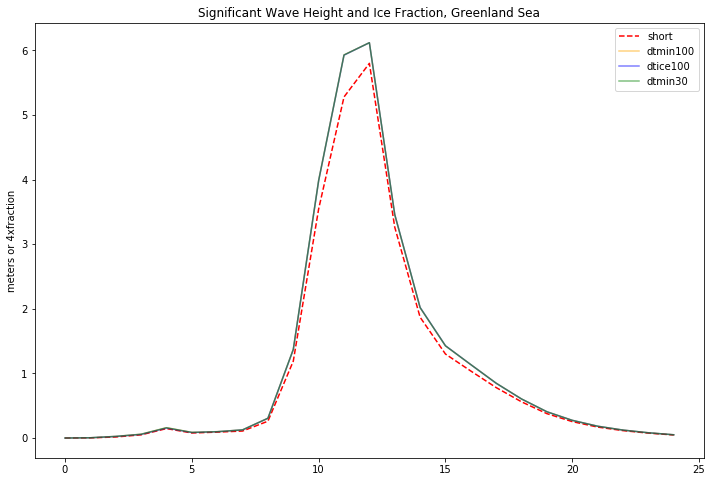

In [123]:
nysel = 372
nxrange = 67

fig=plt.figure(figsize=(12,8))
plt.plot(short.EF.sel(NY=nysel).sel(NX=nxrange),label='short',color='r',ls='--')
plt.plot(dtmin100.EF.sel(NY=nysel).sel(NX=nxrange),label='dtmin100',alpha=0.5,c='orange')
plt.plot(dtice100.EF.sel(NY=nysel).sel(NX=nxrange),label='dtice100',alpha=0.5,c='b')
plt.plot(dtmin30.EF.sel(NY=nysel).sel(NX=nxrange),label='dtmin30',alpha=0.5,c='g')
# plt.plot(4*short.ICE.sel(NY=nysel).sel(NX=nxrange),label='ice fraction',c='k')
plt.legend()
plt.ylabel('meters or 4xfraction')
plt.title('Significant Wave Height and Ice Fraction, Greenland Sea')
plt.show()

# fig=plt.figure(figsize=(12,8))
# plt.plot(short.FP0.sel(NY=nysel).sel(NX=nxrange),label='short',color='r',ls='--')
# plt.plot(dtmin100.FP0.sel(NY=nysel).sel(NX=nxrange),label='dtmin100',alpha=0.5,c='orange')
# plt.plot(dtice100.FP0.sel(NY=nysel).sel(NX=nxrange),label='dtice100',alpha=0.5,c='b')
# plt.plot(dtmin30.FP0.sel(NY=nysel).sel(NX=nxrange),label='dtmin30',alpha=0.5,c='g')
# plt.legend()
# plt.ylabel('Hz')
# plt.show()

ice fraction is 0.9314703941345215


(0.001, 5.053853416262298)

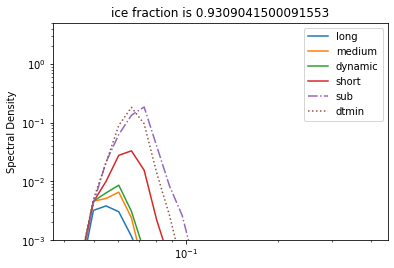

In [94]:
# sample gridpoint alongside of Greenland, inside of ice 
nx=30
fig=plt.figure()
plt.plot(long.FREQ,long.EF.sel(NY=372).sel(NX=nx),label='long')
plt.plot(long.FREQ,med.EF.sel(NY=372).sel(NX=nx),label='medium')
plt.plot(long.FREQ,dyn.EF.sel(NY=372).sel(NX=nx),label='dynamic')
plt.plot(long.FREQ,short.EF.sel(NY=372).sel(NX=nx),label='short')

plt.plot(long.FREQ,sub.EF.sel(NY=372).sel(NX=nx),label='sub',ls='-.')
plt.plot(long.FREQ,dtmin100.EF.sel(NY=372).sel(NX=nx),label='dtmin',ls='dotted')

print('ice fraction is '+str(sub.ICE.sel(NY=372).sel(NX=nx).values))

plt.title('ice fraction is '+str(long.ICE.sel(NY=372).sel(NX=nx).values))
plt.legend()
plt.ylabel('Spectral Density')
plt.loglog()
plt.ylim(10**-3,)

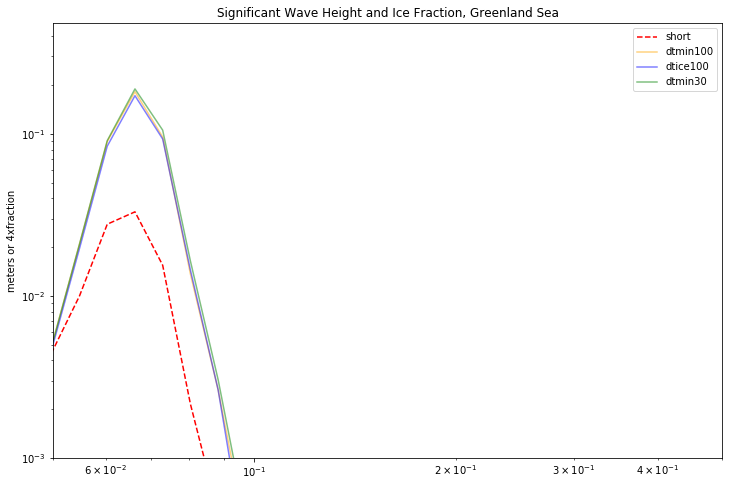

In [130]:
nysel = 372
nxrange = 30

fig=plt.figure(figsize=(12,8))
plt.plot(short.FREQ,short.EF.sel(NY=nysel).sel(NX=nxrange),label='short',color='r',ls='--')
plt.plot(short.FREQ,dtmin100.EF.sel(NY=nysel).sel(NX=nxrange),label='dtmin100',alpha=0.5,c='orange')
plt.plot(short.FREQ,dtice100.EF.sel(NY=nysel).sel(NX=nxrange),label='dtice100',alpha=0.5,c='b')
plt.plot(short.FREQ,dtmin30.EF.sel(NY=nysel).sel(NX=nxrange),label='dtmin30',alpha=0.5,c='g')
# plt.plot(4*short.ICE.sel(NY=nysel).sel(NX=nxrange),label='ice fraction',c='k')
plt.legend()
plt.ylabel('meters or 4xfraction')
plt.title('Significant Wave Height and Ice Fraction, Greenland Sea')
plt.loglog()
plt.ylim(10**-3,)
plt.xlim(0.05,0.5)
plt.show()

# fig=plt.figure(figsize=(12,8))
# plt.plot(short.FP0.sel(NY=nysel).sel(NX=nxrange),label='short',color='r',ls='--')
# plt.plot(dtmin100.FP0.sel(NY=nysel).sel(NX=nxrange),label='dtmin100',alpha=0.5,c='orange')
# plt.plot(dtice100.FP0.sel(NY=nysel).sel(NX=nxrange),label='dtice100',alpha=0.5,c='b')
# plt.plot(dtmin30.FP0.sel(NY=nysel).sel(NX=nxrange),label='dtmin30',alpha=0.5,c='g')
# plt.legend()
# plt.ylabel('Hz')
# plt.show()

(0.001, 150.5968680433155)

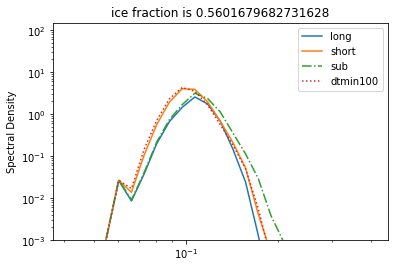

In [97]:
# sample gridpoint alongside of Greenland, inside of ice 
nx=98
fig=plt.figure()
plt.plot(long.FREQ,long.EF.sel(NY=372).sel(NX=nx),label='long')
# plt.plot(long.FREQ,med.EF.sel(NY=372).sel(NX=nx),label='medium')
# plt.plot(long.FREQ,dyn.EF.sel(NY=372).sel(NX=nx),label='dynamic')
plt.plot(long.FREQ,short.EF.sel(NY=372).sel(NX=nx),label='short')

plt.plot(long.FREQ,sub.EF.sel(NY=372).sel(NX=nx),label='sub',ls='-.')
plt.plot(long.FREQ,dtmin100.EF.sel(NY=372).sel(NX=nx),label='dtmin100',ls='dotted')

plt.title('ice fraction is '+str(long.ICE.sel(NY=372).sel(NX=nx).values))
plt.legend()
plt.ylabel('Spectral Density')
plt.loglog()
plt.ylim(10**-3,)

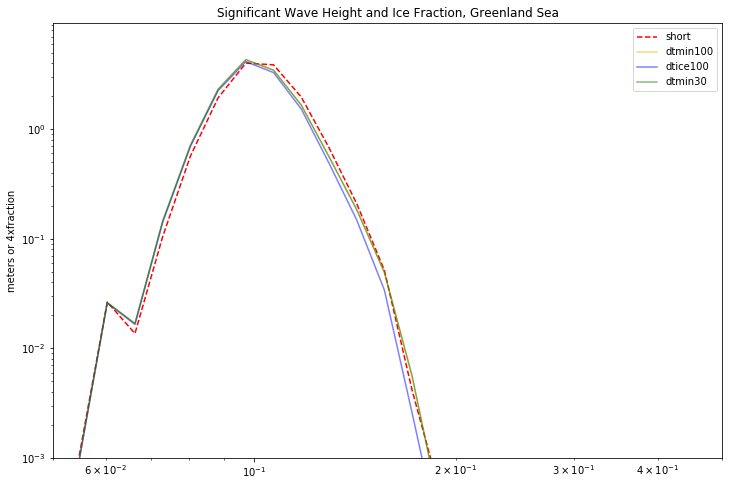

0.5610607266426086


In [132]:
nysel = 372
nxrange = 98

fig=plt.figure(figsize=(12,8))
plt.plot(short.FREQ,short.EF.sel(NY=nysel).sel(NX=nxrange),label='short',color='r',ls='--')
plt.plot(short.FREQ,dtmin100.EF.sel(NY=nysel).sel(NX=nxrange),label='dtmin100',alpha=0.5,c='orange')
plt.plot(short.FREQ,dtice100.EF.sel(NY=nysel).sel(NX=nxrange),label='dtice100',alpha=0.5,c='b')
plt.plot(short.FREQ,dtmin30.EF.sel(NY=nysel).sel(NX=nxrange),label='dtmin30',alpha=0.5,c='g')
# plt.plot(4*short.ICE.sel(NY=nysel).sel(NX=nxrange),label='ice fraction',c='k')
plt.legend()
plt.ylabel('meters or 4xfraction')
plt.title('Significant Wave Height and Ice Fraction, Greenland Sea')
plt.loglog()
plt.ylim(10**-3,)
plt.xlim(0.05,0.5)
plt.show()
print(short.ICE.sel(NY=nysel).sel(NX=nxrange).values)

Text(0, 0.5, 'Energy Density FREQ= 5 or fraction')

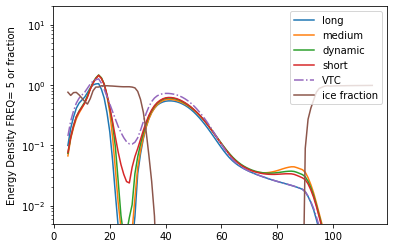

In [32]:
# alongside of Greenland, in/out of ice 
nf=5
fig=plt.figure()
plt.plot(long.EF.sel(FREQ=nf).sel(NY=372).sel(NX=range(5,120)),label='long')
plt.plot(med.EF.sel(FREQ=nf).sel(NY=372).sel(NX=range(5,120)),label='medium')
plt.plot(dyn.EF.sel(FREQ=nf).sel(NY=372).sel(NX=range(5,120)),label='dynamic')
plt.plot(short.EF.sel(FREQ=nf).sel(NY=372).sel(NX=range(5,120)),label='short')

plt.plot(sub.EF.sel(FREQ=nf).sel(NY=372).sel(NX=range(5,120)),label='VTC',ls='-.')

plt.plot(long.ICE.sel(NY=372).sel(NX=range(5,120)),label='ice fraction')
plt.ylim(0.005,20)
plt.yscale('log')
plt.legend()
plt.ylabel('Energy Density FREQ= '+str(nf)+' or fraction')
#plt.title('Significant Wave Height and Ice Fraction, Greenland Sea')

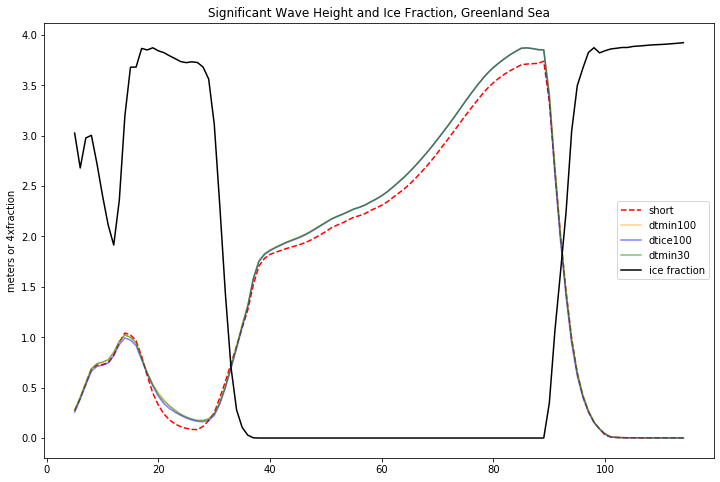

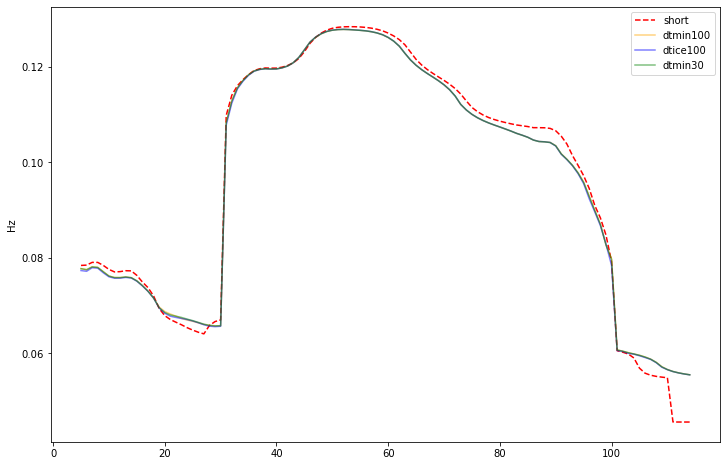

In [133]:
nysel = 372
nxrange = range(5,120)

fig=plt.figure(figsize=(12,8))
plt.plot(short.HS.sel(NY=nysel).sel(NX=nxrange),label='short',color='r',ls='--')
plt.plot(dtmin100.HS.sel(NY=nysel).sel(NX=nxrange),label='dtmin100',alpha=0.5,c='orange')
plt.plot(dtice100.HS.sel(NY=nysel).sel(NX=nxrange),label='dtice100',alpha=0.5,c='b')
plt.plot(dtmin30.HS.sel(NY=nysel).sel(NX=nxrange),label='dtmin30',alpha=0.5,c='g')
plt.plot(4*short.ICE.sel(NY=nysel).sel(NX=nxrange),label='ice fraction',c='k')
plt.legend()
plt.ylabel('meters or 4xfraction')
plt.title('Significant Wave Height and Ice Fraction, Greenland Sea')
plt.show()

fig=plt.figure(figsize=(12,8))
plt.plot(short.FP0.sel(NY=nysel).sel(NX=nxrange),label='short',color='r',ls='--')
plt.plot(dtmin100.FP0.sel(NY=nysel).sel(NX=nxrange),label='dtmin100',alpha=0.5,c='orange')
plt.plot(dtice100.FP0.sel(NY=nysel).sel(NX=nxrange),label='dtice100',alpha=0.5,c='b')
plt.plot(dtmin30.FP0.sel(NY=nysel).sel(NX=nxrange),label='dtmin30',alpha=0.5,c='g')
plt.legend()
plt.ylabel('Hz')
plt.show()

Text(0, 0.5, 'Energy Density FREQ= 13 or fraction')

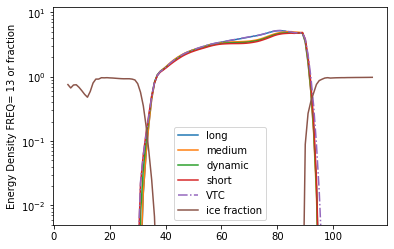

In [33]:
# alongside of Greenland, in/out of ice 
nf=13
ny=372
fig=plt.figure()
plt.plot(long.EF.sel(FREQ=nf).sel(NY=ny).sel(NX=range(5,120)),label='long')
plt.plot(med.EF.sel(FREQ=nf).sel(NY=ny).sel(NX=range(5,120)),label='medium')
plt.plot(dyn.EF.sel(FREQ=nf).sel(NY=ny).sel(NX=range(5,120)),label='dynamic')
plt.plot(short.EF.sel(FREQ=nf).sel(NY=ny).sel(NX=range(5,120)),label='short')

plt.plot(sub.EF.sel(FREQ=nf).sel(NY=ny).sel(NX=range(5,120)),label='VTC',ls='-.')

plt.plot(long.ICE.sel(NY=ny).sel(NX=range(5,120)),label='ice fraction')


plt.yscale('log')
plt.ylim(0.005,12)
plt.legend()
plt.ylabel('Energy Density FREQ= '+str(nf)+' or fraction')
#plt.title('Significant Wave Height and Ice Fraction, Greenland Sea')

Text(0.5, 1.0, 'Significant Wave Height and Ice Fraction, Greenland Sea')

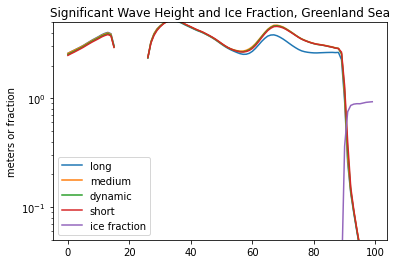

In [12]:
# alongside of Greenland, in/out of ice 
ny=362
#ny=372
fig=plt.figure()
plt.plot(long.HS.sel(NY=ny).sel(NX=range(5,105)),label='long')
plt.plot(med.HS.sel(NY=ny).sel(NX=range(5,105)),label='medium')
plt.plot(dyn.HS.sel(NY=ny).sel(NX=range(5,105)),label='dynamic')
plt.plot(short.HS.sel(NY=ny).sel(NX=range(5,105)),label='short')
plt.plot(long.ICE.sel(NY=ny).sel(NX=range(5,105)),label='ice fraction')
plt.yscale('log')
plt.ylim(0.05,5)
plt.legend()
plt.ylabel('meters or fraction')
plt.title('Significant Wave Height and Ice Fraction, Greenland Sea')

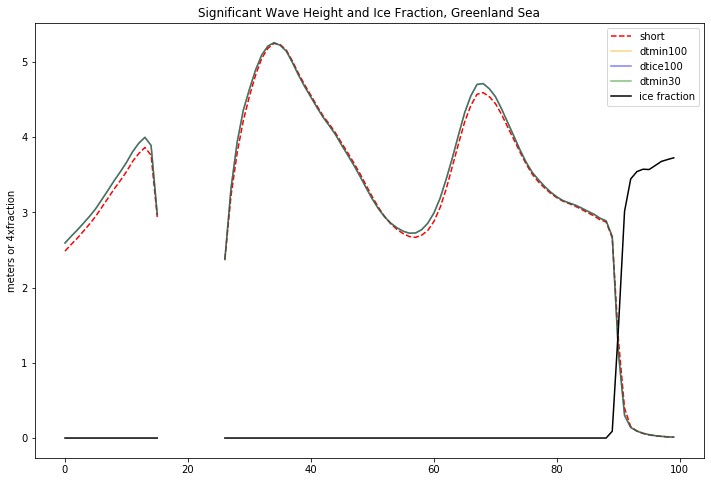

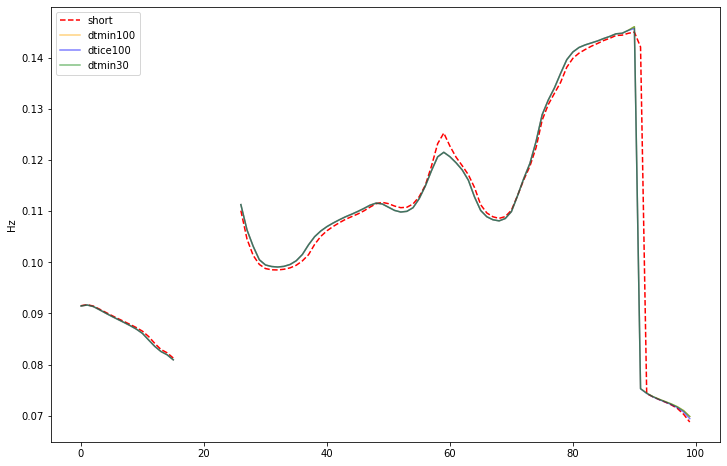

In [134]:
nysel = 362
nxrange = range(5,105)

fig=plt.figure(figsize=(12,8))
plt.plot(short.HS.sel(NY=nysel).sel(NX=nxrange),label='short',color='r',ls='--')
plt.plot(dtmin100.HS.sel(NY=nysel).sel(NX=nxrange),label='dtmin100',alpha=0.5,c='orange')
plt.plot(dtice100.HS.sel(NY=nysel).sel(NX=nxrange),label='dtice100',alpha=0.5,c='b')
plt.plot(dtmin30.HS.sel(NY=nysel).sel(NX=nxrange),label='dtmin30',alpha=0.5,c='g')
plt.plot(4*short.ICE.sel(NY=nysel).sel(NX=nxrange),label='ice fraction',c='k')
plt.legend()
plt.ylabel('meters or 4xfraction')
plt.title('Significant Wave Height and Ice Fraction, Greenland Sea')
plt.show()

fig=plt.figure(figsize=(12,8))
plt.plot(short.FP0.sel(NY=nysel).sel(NX=nxrange),label='short',color='r',ls='--')
plt.plot(dtmin100.FP0.sel(NY=nysel).sel(NX=nxrange),label='dtmin100',alpha=0.5,c='orange')
plt.plot(dtice100.FP0.sel(NY=nysel).sel(NX=nxrange),label='dtice100',alpha=0.5,c='b')
plt.plot(dtmin30.FP0.sel(NY=nysel).sel(NX=nxrange),label='dtmin30',alpha=0.5,c='g')
plt.legend()
plt.ylabel('Hz')
plt.show()

Text(0, 0.5, 'Spectral Density')

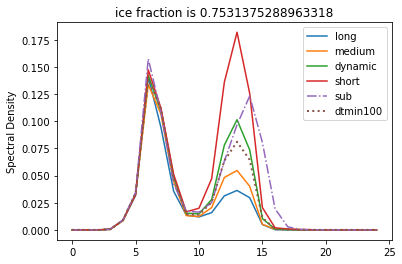

In [102]:
# sample gridpoint alongside of Greenland, outside of ice 
nx=96
ny=362
fig=plt.figure()
plt.plot(long.EF.sel(NY=ny).sel(NX=nx),label='long')
plt.plot(med.EF.sel(NY=ny).sel(NX=nx),label='medium')
plt.plot(dyn.EF.sel(NY=ny).sel(NX=nx),label='dynamic')
plt.plot(short.EF.sel(NY=ny).sel(NX=nx),label='short')

plt.plot(sub.EF.sel(NY=ny).sel(NX=nx),label='sub',ls='-.')
plt.plot(dtmin100.EF.sel(NY=ny).sel(NX=nx),label='dtmin100',ls='dotted',lw=2)

plt.title('ice fraction is '+str(long.ICE.sel(NY=ny).sel(NX=nx).values))
plt.legend()
plt.ylabel('Spectral Density')

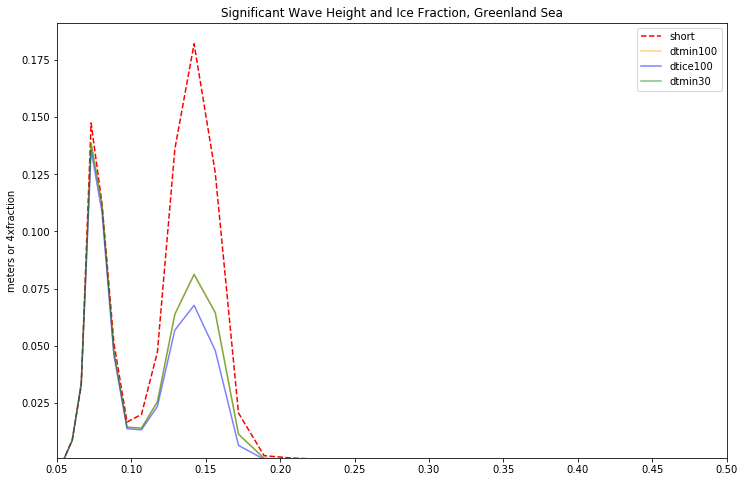

0.7529582381248474


In [136]:
nysel = 362
nxrange = 96

fig=plt.figure(figsize=(12,8))
plt.plot(short.FREQ,short.EF.sel(NY=nysel).sel(NX=nxrange),label='short',color='r',ls='--')
plt.plot(short.FREQ,dtmin100.EF.sel(NY=nysel).sel(NX=nxrange),label='dtmin100',alpha=0.5,c='orange')
plt.plot(short.FREQ,dtice100.EF.sel(NY=nysel).sel(NX=nxrange),label='dtice100',alpha=0.5,c='b')
plt.plot(short.FREQ,dtmin30.EF.sel(NY=nysel).sel(NX=nxrange),label='dtmin30',alpha=0.5,c='g')
# plt.plot(4*short.ICE.sel(NY=nysel).sel(NX=nxrange),label='ice fraction',c='k')
plt.legend()
plt.ylabel('meters or 4xfraction')
plt.title('Significant Wave Height and Ice Fraction, Greenland Sea')
# plt.loglog()
plt.ylim(10**-3,)
plt.xlim(0.05,0.5)
plt.show()
print(short.ICE.sel(NY=nysel).sel(NX=nxrange).values)

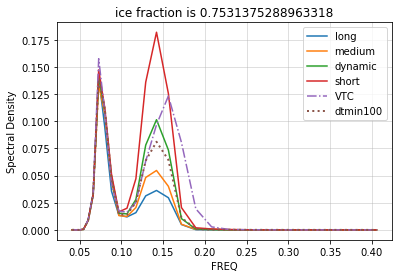

(0.06, 0.45475984445588763)

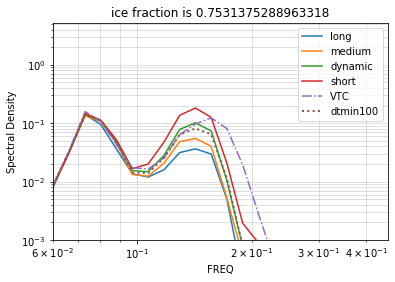

In [107]:
# sample gridpoint alongside of Greenland, outside of ice 
nx=96
ny=362
fig=plt.figure()
long.EF.sel(NY=ny).sel(NX=nx).plot(label='long')
med.EF.sel(NY=ny).sel(NX=nx).plot(label='medium')
dyn.EF.sel(NY=ny).sel(NX=nx).plot(label='dynamic')
short.EF.sel(NY=ny).sel(NX=nx).plot(label='short')

sub.EF.sel(NY=ny).sel(NX=nx).plot(label='VTC',ls='-.')
plt.plot(long.FREQ,dtmin100.EF.sel(NY=ny).sel(NX=nx),label='dtmin100',ls='dotted',lw=2)

plt.title('ice fraction is '+str(long.ICE.sel(NY=ny).sel(NX=nx).values))
plt.legend()
plt.ylabel('Spectral Density')
plt.grid(True,which='both',alpha=0.5)
plt.show()

fig=plt.figure()
long.EF.sel(NY=ny).sel(NX=nx).plot(label='long')
med.EF.sel(NY=ny).sel(NX=nx).plot(label='medium')
dyn.EF.sel(NY=ny).sel(NX=nx).plot(label='dynamic')
short.EF.sel(NY=ny).sel(NX=nx).plot(label='short')

sub.EF.sel(NY=ny).sel(NX=nx).plot(label='VTC',ls='-.')
plt.plot(long.FREQ,dtmin100.EF.sel(NY=ny).sel(NX=nx),label='dtmin100',ls='dotted',lw=2)

plt.title('ice fraction is '+str(long.ICE.sel(NY=ny).sel(NX=nx).values))
plt.legend()
plt.ylabel('Spectral Density')
plt.loglog()
plt.grid(True,which='both',alpha=0.5)
plt.ylim(10**-3,)
plt.xlim(0.06,)

## Spot checking model output

In [16]:
# tempww = xr.open_dataset('/glade/scratch/vcooper/cesm23iw_dtice100_w-nl-hf/run/cesm23iw_dtice100_w-nl-hf.ww3.hi.2018-07-03-18000.nc')
# tempww = xr.open_dataset('/glade/scratch/vcooper/cesm23iw_dtice100_w-nl-hf/run/cesm23iw_dtice100_w-nl-hf.ww3.hi.2018-07-23-82800.nc')
# tempww = xr.open_dataset('/glade/scratch/vcooper/cesm23iw_ic4m1/run/cesm23iw_ic4m1.ww3.hi.2018-07-03-18000.nc')
tempww = xr.open_dataset('/glade/scratch/vcooper/cesm23iw_ic4m3/run/cesm23iw_ic4m3.ww3.hi.2018-07-03-18000.nc')

In [17]:
tempww['FREQ'] = temp_f.f.values

## f-4 line
xx = np.linspace(0.3,0.4,20)
AA = 0.1/(0.3**-4)
yy = AA * np.linspace(0.3,0.4,20)**(-4)

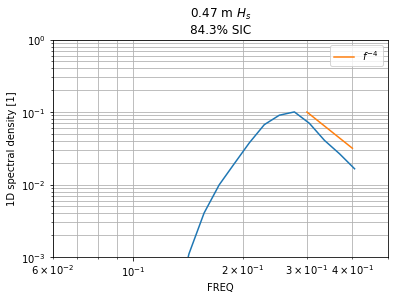

In [37]:
## DONT TOUCH: this is from T2T4windat50p
isel_ni = 163
isel_nj = 355

tempww.EF[:,isel_nj,isel_ni].plot()
plt.loglog()
plt.ylim(10**-3,1)
plt.xlim(0.06,0.5)
plt.grid(True,which='both')
plt.title(
    str(np.round(tempww.HS[isel_nj,isel_ni].values,2)) + ' m $H_s$\n' + 
    str(np.round(tempww.ICE[isel_nj,isel_ni].values,3)*100) + '% SIC')
plt.plot(xx,yy,label='$f^{-4}$')
plt.legend()
plt.show()

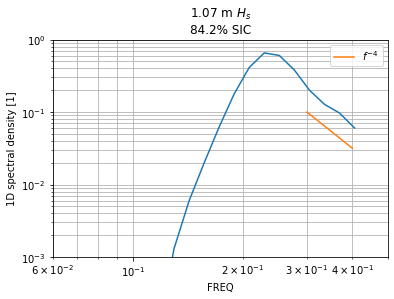

In [7]:
## DONT TOUCH: this is from nl_damped
isel_ni = 163
isel_nj = 355

tempww.EF[:,isel_nj,isel_ni].plot()
plt.loglog()
plt.ylim(10**-3,1)
plt.xlim(0.06,0.5)
plt.grid(True,which='both')
plt.title(
    str(np.round(tempww.HS[isel_nj,isel_ni].values,2)) + ' m $H_s$\n' + 
    str(np.round(tempww.ICE[isel_nj,isel_ni].values,3)*100) + '% SIC')
plt.plot(xx,yy,label='$f^{-4}$')
plt.legend()
plt.show()

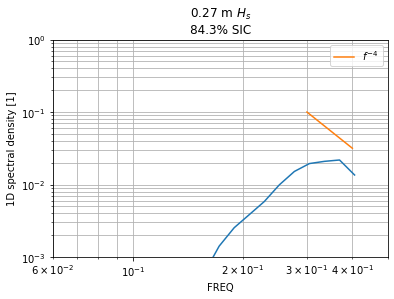

In [13]:
## this is from case where linear Source term gets damped by ice, but nonlinear does not
isel_ni = 163
isel_nj = 355

tempww.EF[:,isel_nj,isel_ni].plot()
plt.loglog()
plt.ylim(10**-3,1)
plt.xlim(0.06,0.5)
plt.grid(True,which='both')
plt.title(
    str(np.round(tempww.HS[isel_nj,isel_ni].values,2)) + ' m $H_s$\n' + 
    str(np.round(tempww.ICE[isel_nj,isel_ni].values,3)*100) + '% SIC')
plt.plot(xx,yy,label='$f^{-4}$')
plt.legend()
plt.show()

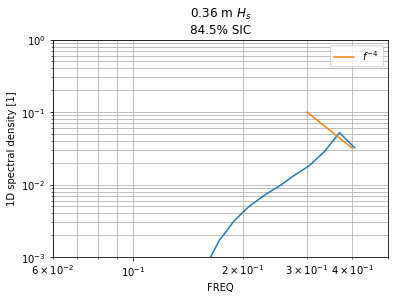

In [15]:
## ic4m1 wD nlD lnU
isel_ni = 163
isel_nj = 355

tempww.EF[:,isel_nj,isel_ni].plot()
plt.loglog()
plt.ylim(10**-3,1)
plt.xlim(0.06,0.5)
plt.grid(True,which='both')
plt.title(
    str(np.round(tempww.HS[isel_nj,isel_ni].values,2)) + ' m $H_s$\n' + 
    str(np.round(tempww.ICE[isel_nj,isel_ni].values,3)*100) + '% SIC')
plt.plot(xx,yy,label='$f^{-4}$')
plt.legend()
plt.show()

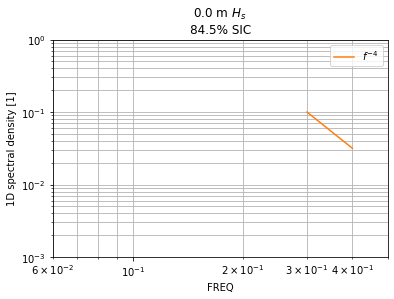

In [20]:
## ic4m3 w50 nl50 lnU
isel_ni = 163
isel_nj = 355

tempww.EF[:,isel_nj,isel_ni].plot()
plt.loglog()
plt.ylim(10**-3,1)
plt.xlim(0.06,0.5)
plt.grid(True,which='both')
plt.title(
    str(np.round(tempww.HS[isel_nj,isel_ni].values,2)) + ' m $H_s$\n' + 
    str(np.round(tempww.ICE[isel_nj,isel_ni].values,3)*100) + '% SIC')
plt.plot(xx,yy,label='$f^{-4}$')
plt.legend()
plt.show()